In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline




In [3]:
df = pd.read_csv("training.csv",index_col = 0)

In [4]:
df.head()


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,Q8_3,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
ID,,,,,,,,,,,,,,,,,,,,,
5086,98,2,3,1,1,2,2,0,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1258,40,1,1,3,5,1,1,1,0,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
331,18,2,4,6,3,2,1,0,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2
6729,50,1,1,3,1,1,1,0,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,3
8671,34,1,1,1,1,2,1,0,1,0,...,-1,1,4,-7.179645,31.039095,1,1,0,1,3




# Missing Data



# 1.Examine the dataset. Are there any missing observations or columns where the data do not seem valid?

In [5]:
#Finding missing observations

df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 7094 entries, 5086 to 3946
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Q1                           7094 non-null   int64  
 1   Q2                           7094 non-null   int64  
 2   Q3                           7094 non-null   int64  
 3   Q4                           7094 non-null   int64  
 4   Q5                           7094 non-null   int64  
 5   Q6                           7094 non-null   int64  
 6   Q7                           7094 non-null   int64  
 7   Q8_1                         7094 non-null   int64  
 8   Q8_2                         7094 non-null   int64  
 9   Q8_3                         7094 non-null   int64  
 10  Q8_4                         7094 non-null   int64  
 11  Q8_5                         7094 non-null   int64  
 12  Q8_6                         7094 non-null   int64  
 13  Q8_7           

In [6]:
df.corr()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,Q8_3,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
Q1,1.000000,-0.052484,-0.161434,-0.329742,-0.362815,-0.094837,0.081805,-0.064513,0.140593,-0.045270,...,-0.012336,0.274705,0.205274,-0.034037,0.032342,-0.130623,-0.070161,-0.073142,0.107807,-0.127881
Q2,-0.052484,1.000000,0.011540,-0.117319,0.101568,0.113456,0.184709,-0.084585,-0.082230,-0.016613,...,-0.048690,0.143204,0.133639,0.007249,0.005003,-0.131080,-0.083250,-0.071918,0.005720,-0.142522
Q3,-0.161434,0.011540,1.000000,0.152441,0.175220,0.105623,0.024248,0.055995,-0.231267,-0.001252,...,-0.019762,-0.021926,-0.153409,0.011082,0.062576,0.005213,-0.046364,-0.103094,-0.036101,-0.033330
Q4,-0.329742,-0.117319,0.152441,1.000000,0.239325,-0.066519,-0.314218,0.317273,-0.207214,0.060460,...,0.332095,-0.565468,-0.632613,0.030085,0.125175,0.335169,0.180151,0.116817,0.109255,0.337340
Q5,-0.362815,0.101568,0.175220,0.239325,1.000000,0.063709,-0.071444,0.155615,-0.249640,0.034118,...,0.100525,-0.111005,-0.164312,0.078872,0.026917,0.111421,0.025777,0.008769,-0.039233,0.095937
Q6,-0.094837,0.113456,0.105623,-0.066519,0.063709,1.000000,0.110981,-0.080841,-0.025799,-0.012043,...,-0.117216,0.061508,0.060724,0.009000,-0.018210,-0.097172,-0.121290,-0.025949,-0.046139,-0.116153
Q7,0.081805,0.184709,0.024248,-0.314218,-0.071444,0.110981,1.000000,-0.180690,0.020998,-0.104603,...,-0.260335,0.322407,0.251968,-0.029356,-0.142345,-0.550930,-0.194026,-0.143032,-0.085194,-0.529444
Q8_1,-0.064513,-0.084585,0.055995,0.317273,0.155615,-0.080841,-0.180690,1.000000,-0.204222,-0.033977,...,0.254515,-0.121980,-0.257012,0.005512,0.080664,0.172287,0.149281,0.080230,0.169942,0.185612
Q8_2,0.140593,-0.082230,-0.231267,-0.207214,-0.249640,-0.025799,0.020998,-0.204222,1.000000,-0.123099,...,-0.106688,0.037181,0.149740,-0.071891,-0.140558,-0.034852,0.089040,0.084820,0.016211,0.013485
Q8_3,-0.045270,-0.016613,-0.001252,0.060460,0.034118,-0.012043,-0.104603,-0.033977,-0.123099,1.000000,...,0.076440,-0.067968,-0.059150,-0.018020,0.049872,0.105190,0.066319,0.044574,0.002831,0.108115


There are no missing observations



# 2.Get basic descriptive statistics for the dataset.

In [7]:
df.describe()


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,Q8_3,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
count,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,...,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000
mean,38.239498,1.559910,1.787426,3.060051,2.548915,1.840569,1.397942,0.062165,0.630110,0.058077,...,-0.431914,1.860164,3.163378,-6.034378,35.354029,0.553989,0.461517,0.432901,0.151255,1.799267
std,16.332148,0.496433,1.165160,1.557779,1.534257,0.366103,0.489508,0.241472,0.482809,0.233906,...,1.489879,1.351372,1.317691,2.720888,2.899511,0.497112,0.498552,0.495512,0.358322,1.196955
min,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,-1.000000,1.000000,1.000000,-11.467463,29.639578,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,-1.000000,1.000000,2.000000,-8.275387,32.935429,0.000000,0.000000,0.000000,0.000000,1.000000
50%,35.000000,2.000000,1.000000,3.000000,3.000000,2.000000,1.000000,0.000000,1.000000,0.000000,...,-1.000000,1.000000,4.000000,-6.087854,35.073326,1.000000,0.000000,0.000000,0.000000,2.000000
75%,48.000000,2.000000,3.000000,3.000000,4.000000,2.000000,2.000000,0.000000,1.000000,0.000000,...,-1.000000,4.000000,4.000000,-3.517053,38.351815,1.000000,1.000000,1.000000,0.000000,3.000000
max,100.000000,2.000000,4.000000,8.000000,6.000000,2.000000,2.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,-1.084000,40.258744,1.000000,1.000000,1.000000,1.000000,3.000000


# 3.Create appropriate graphs to visually represent the relationship between financial services accessed (non-mobile, mobile, both) and age, gender, marital status, land ownership and type of income.

Classifying the rows in the dataframe for non mobile money users and mobile money users in a new column

In [8]:
mobile_money = df[(df.mobile_money_classification == 2) | (df.mobile_money_classification == 3)]


In [9]:
classification = []
for i in df["mobile_money_classification"]:
    if i == 0 or i == 1:
        classification.append("Non_mobile_money")
    else:
        classification.append("mobile_money")
df["classification"] = classification

Visualising data for (non mobile money,mobile money and both) and gender

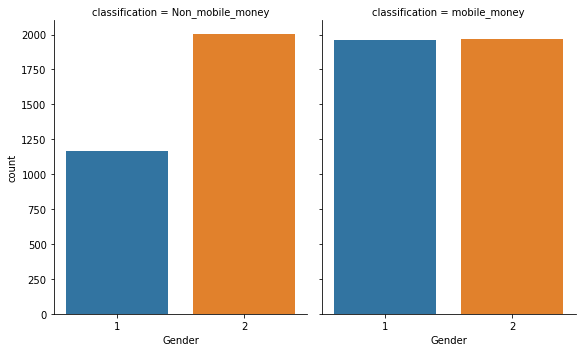

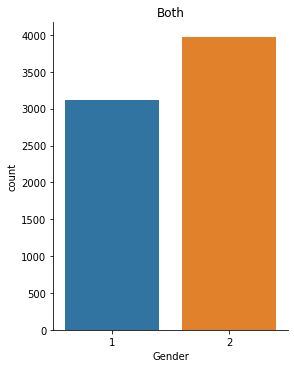

In [10]:
# Checking the gender of non mobile money,mobile money and both
sns.catplot(x = "Q2",kind = "count", col = "classification", aspect=.8, data = df).set(xlabel = "Gender")
sns.catplot(x = "Q2",kind = "count",aspect =.8, data = df).set(title = "Both", xlabel = "Gender")


Visualising data for (non mobile money,mobile money and both) and maritual status

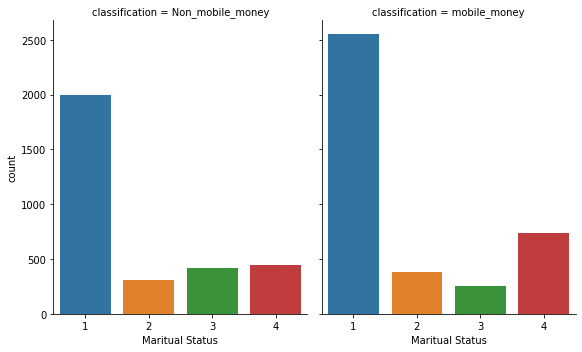

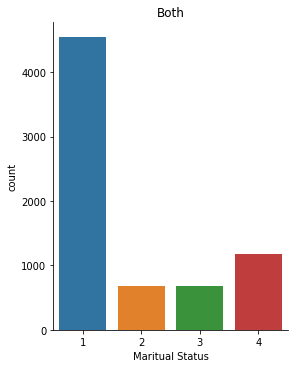

In [11]:
# Checking the maritual status of non mobile money,mobile money and both

sns.catplot(x = "Q3",kind = "count", col = "classification" ,aspect=.8, data = df).set(xlabel = "Maritual Status")
sns.catplot(x = "Q3",kind = "count",aspect =.8, data = df).set(title = "Both" ,xlabel = "Maritual Status")

Visualising data for (non mobile money,mobile money and both) and age

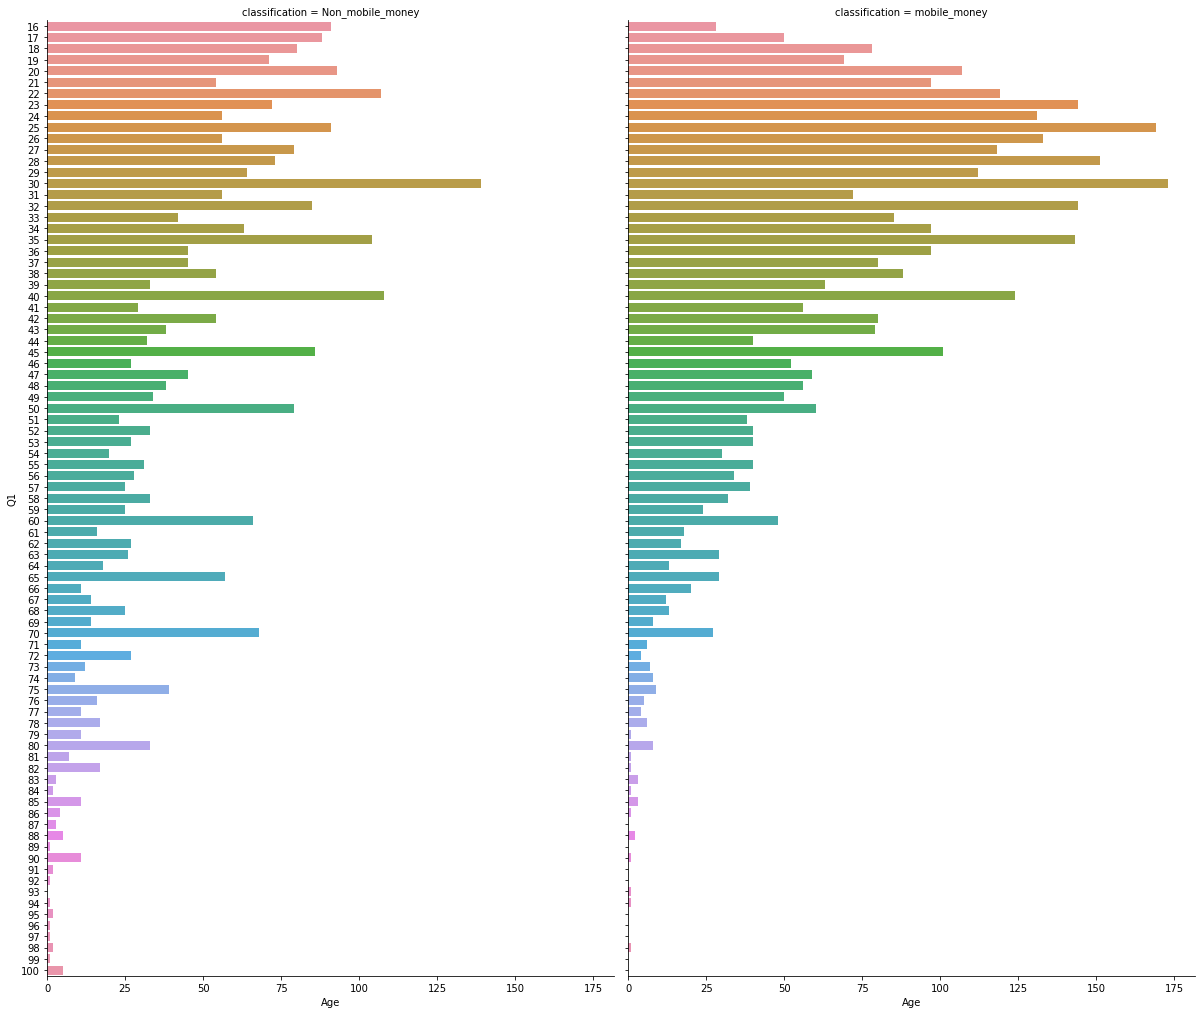

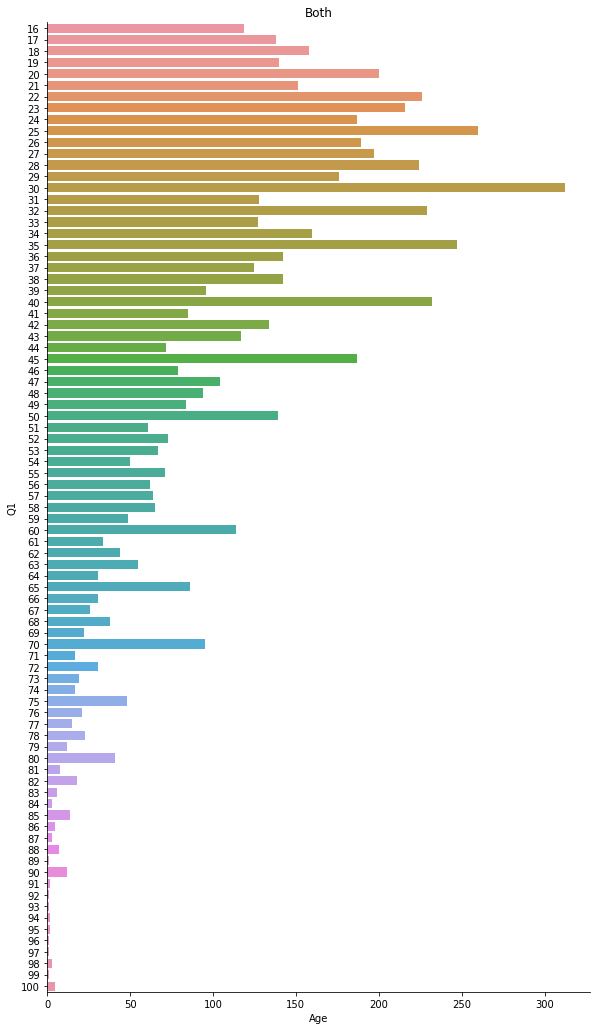

In [13]:
#Checking the ages of the non mobile money,mobile money and both

sns.catplot(y = "Q1",kind = "count", col = "classification", height = 14, aspect =.6, data = df).set(xlabel = "Age")
sns.catplot(y = "Q1",kind = "count", height = 14,aspect =.6, data = df).set(title = "Both", xlabel = "Age")


Visualising data for (non mobile money,mobile money and both) and type of income 

In [ ]:
# Checking income type of non mobile money,mobile money and both


